<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #847ACC> <h1> Atrato JR Data Scientist Challenge <center></h1> </font>
    
<center> <font color= #847ACC> <font size = 4>  Rubén Hernández Guevara <center> </font> 
<br>
<center> Repository: https://github.com/Ruhguevara/Atrato_JR_DS_Challenge
<br>
<br>
<hr style="border:0.02in solid gray"> </hr>


<font color= #847ACC> <h1> Problem: </h1> </font>

**Introduction:** 

In this challenge, you will tackle the task of predicting the probability that a student will pass a grade. As a data scientist, you must choose and apply the best algorithm to build a predictive model. 

**Context:** 

Imagine you are part of a data science team working for an educational institution. The team is tasked with developing a predictive model that can assist in identifying students who are likely to pass or fail the grade. Such a model can provide valuable insights into student performance and help in designing targeted interventions to support struggling students.

**Tasks:**

- Load and explore the dataset
- Visualize the relationships:
    - Bivariate analysis.
    - Correlation matrix.
    - Others
- Normalize or standardize features if necessary.
- Build a predictive model.
- Train the model.
- Assess the model's performance using metrics such as accuracy, confusion matrix, and classification report.
- Interpret the results of the model.
- Communicate conclusions regarding the founding relationships.
- Provide actionable recommendations based on the

**Dataset:** 

https://archive.ics.uci.edu/dataset/320/student+performance

- Share a diagram that shows an en-to- end pipeline data science project from experimentation to a productive environment.
- You can use https://www.drawio.com/

**Extra Points:**
- How to integrate DVC in the pipeline.
- How to integrate MLFLOW in the pipeline.

Can you explain and give eofes about the following concepts:
- Encapsulation
- Abstraction
- Inheritance
- Polymorphis

___

<h1> <font color= #847ACC> Content </h1>
<a id="IND"></a>

**Click on the Chapter/Section to go to it❗** 

**Use the arrows to return to this index❗**

<b> I.  [Dataset](#DATASET) </b><br>
- [ ] [Important Information](#IMPI)
- [ ] [Data](#DATA)
- [ ] [Data Categories](#DC)
- [ ] [Qualitative Research](#QRE)


<b> II. [Preprocessing](#PREP)</b><br>
- [ ] [Encoding](#ENC)


<b> III.  [Exploratory Data Analysis](#EDA) </b><br>
- [ ] [Exploration](#EXP)
- [ ] [Missing Values](#MISS)
- [ ] [Duplicates](#DUPLI)
- [ ] [Unique Values](#UNIQ)
- [ ] [Relationships](#REL)

<b> IV. [Statistics](#EST)</b><br>
- [ ] [Measures of Central Tendency & Variability](#MTCV)
- [ ] [Distributions](#DIST)
- [ ] [Class Balance](#BAL)

<b> V. [Models](#MODELOS)</b><br>
- [ ] [Logistic Regression](#RL)
  - [ ] [Metrics](#LRMET)
  - [ ] [Decile Analysis](#DAN)
  - [ ] [Predictions with new Threshold](#LRPNT)
- [ ] [XGBoost](#XGB)
    
<b> VI. [Conclusions](#CONC)</b><br>

___

### How to run the notebook:

First, it is suggested to create a virtual environment and activate it with the following command:

`python -m venv venv` -> `source venv/Scripts/activate` 

After activating the virtual env, install the requirements:

`pip install -r requirements.txt`

Then, execute the following code to start the notebook:

`jupyter notebook`

___

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Statistics
from scipy.stats import chi2_contingency, kendalltau

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display_html


# Machine Learning
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, confusion_matrix, make_scorer, roc_auc_score

# Aditional Libraries
from collections import Counter
from EDA import DataExplorer as de # I made this script
import time
import joblib

# Configurations
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
matplotlib.style.use('seaborn')

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
start_time = time.time()

<h1> <font color= #847ACC> Dataset </h1>
<a id="DATASET"></a>
    
___

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Parquet:</font></h3>
    
Parquet as a data storage reduces file size, processing time, and associated costs, which translates to saved money, time, and storage.
    
<center><img src="imgs/parquet.png" width="650" height="200"></center>
    
Source: <br>
<a href="https://parquet.apache.org/docs/"> Apache Parquet Documentation </a> <br>
<a href="https://www.databricks.com/glossary/what-is-parquet"> General Description </a> <br>    

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡</font></h3>

**``The 2.0 version of pandas introduces the Apache Arrow backend, which allows for a more efficient way of storing data in memory:``**

For example:
- int64 $\rightarrow$ int64[pyarrow]
- float64 $\rightarrow$ double[pyarrow]
- string $\rightarrow$ string[pyarrow]
    
I will work with the classic pandas backend with a `.parquet` file (which I converted), but for more computational complex projects I would use an alternative for improving data reading speed like the ``pyarrow backend``, `PySpark`, `Polars` or the recent `cuDF` from NVDIA.

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Important Information </h2>
<a id="IMPI"></a>

- Make sure of modifying the following variable depending on ``which dataset (student-mat.parquet or student-por.parquet)`` you want to check:

    `The default dataset I used was the student-mat.parquet dataset`, although the difference is minimal when using student-por dataset.

In [3]:
dataset = 'data/student-mat.parquet' # Default dataset used in this project.
#dataset = 'data/student-por.parquet'

- There's a high correlation between `G1, G2 and G3` (redundant information), this produces the model to overfit, so in order to create a model capable of generalize to learn relationship between the data I decided to drop `G2` and `G3` from the modeling part.
 
- Another reason for dropping these two variables is because _`the main objective is to predict the probability that a student will pass a
grade.`_ and we have: `Use G3 > 12: 1 else 0.`

- With the previous information, a more real-world and helpful approach would be to ``early predict`` the probability of a student to pass the 3rd Grade. So including/using ``G2`` as an explanatory variable may be too late for taking real world actions and helping the student in risk of not passing the grade, although, in the tests I made including this variable, the metrics improved up to  95\% (while including only ``G1`` the metrics are around 90\%).

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Data </h2>
<a id="DATA"></a>

In [4]:
%%time
df = pd.read_parquet(dataset)

CPU times: total: 0 ns
Wall time: 54.2 ms


<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡</font></h3>

The time required to load the data is actually higher than using a .csv with the traditional backend, 
it is beause of the data size, in larger datasets, the power of using .parquet and pyarrow is huge!

In [5]:
# Here I'm using the criteria specified in the challenge, which is: G3 > 12: 1 else 0. 
df["approved"] = [1 if df["G3"][i] > 12 else 0 for i in range(len(df))]

In [6]:
# Brief display of the data, showing the first two rows, two random rows and the last two rows.
display_html(df.head(2), df.sample(2), df.tail(2))

school 
 sex 
 age 
 address 
 famsize 
 Pstatus 
 Medu 
 Fedu 
 Mjob 
 Fjob 
 reason 
 guardian 
 traveltime 
 studytime 
 failures 
 schoolsup 
 famsup 
 paid 
 activities 
 nursery 
 higher 
 internet 
 romantic 
 famrel 
 freetime 
 goout 
 Dalc 
 Walc 
 health 
 absences 
 G1 
 G2 
 G3 
 approved 
 
 
 
 
 0 
 GP 
 F 
 18 
 U 
 GT3 
 A 
 4 
 4 
 at_home 
 teacher 
 course 
 mother 
 2 
 2 
 0 
 yes 
 no 
 no 
 no 
 yes 
 yes 
 no 
 no 
 4 
 3 
 4 
 1 
 1 
 3 
 6 
 5 
 6 
 6 
 0 
 
 
 1 
 GP 
 F 
 17 
 U 
 GT3 
 T 
 1 
 1 
 at_home 
 other 
 course 
 father 
 1 
 2 
 0 
 no 
 yes 
 no 
 no 
 no 
 yes 
 yes 
 no 
 5 
 3 
 3 
 1 
 1 
 3 
 4 
 5 
 5 
 6 
 0

school 
 sex 
 age 
 address 
 famsize 
 Pstatus 
 Medu 
 Fedu 
 Mjob 
 Fjob 
 reason 
 guardian 
 traveltime 
 studytime 
 failures 
 schoolsup 
 famsup 
 paid 
 activities 
 nursery 
 higher 
 internet 
 romantic 
 famrel 
 freetime 
 goout 
 Dalc 
 Walc 
 health 
 absences 
 G1 
 G2 
 G3 
 approved 
 
 
 
 
 130 
 GP 
 F 
 15 
 R 
 GT3 
 T 
 3 
 4 
 services 
 teacher 
 course 
 father 
 2 
 3 
 2 
 no 
 yes 
 no 
 no 
 yes 
 yes 
 yes 
 yes 
 4 
 2 
 2 
 2 
 2 
 5 
 0 
 12 
 0 
 0 
 0 
 
 
 233 
 GP 
 M 
 16 
 U 
 GT3 
 T 
 4 
 4 
 health 
 other 
 reputation 
 father 
 1 
 2 
 0 
 no 
 yes 
 yes 
 yes 
 yes 
 yes 
 yes 
 no 
 4 
 2 
 4 
 2 
 4 
 1 
 2 
 14 
 13 
 13 
 1

school 
 sex 
 age 
 address 
 famsize 
 Pstatus 
 Medu 
 Fedu 
 Mjob 
 Fjob 
 reason 
 guardian 
 traveltime 
 studytime 
 failures 
 schoolsup 
 famsup 
 paid 
 activities 
 nursery 
 higher 
 internet 
 romantic 
 famrel 
 freetime 
 goout 
 Dalc 
 Walc 
 health 
 absences 
 G1 
 G2 
 G3 
 approved 
 
 
 
 
 393 
 MS 
 M 
 18 
 R 
 LE3 
 T 
 3 
 2 
 services 
 other 
 course 
 mother 
 3 
 1 
 0 
 no 
 no 
 no 
 no 
 no 
 yes 
 yes 
 no 
 4 
 4 
 1 
 3 
 4 
 5 
 0 
 11 
 12 
 10 
 0 
 
 
 394 
 MS 
 M 
 19 
 U 
 LE3 
 T 
 1 
 1 
 other 
 at_home 
 course 
 father 
 1 
 1 
 0 
 no 
 no 
 no 
 no 
 yes 
 yes 
 yes 
 no 
 3 
 2 
 3 
 3 
 3 
 5 
 5 
 8 
 9 
 9 
 0

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Data Categories</h2>
<a id="DC"></a>

**Binary Variables:** These are categorical variables with only two categories.

- school: GP or MS
- sex: F (female) or M (male)
- address: U (urban) or R (rural)
- famsize: LE3 (less or equal to 3) or GT3 (greater than 3)
- Pstatus: T (living together) or A (apart)
- schoolsup: yes or no
- famsup: yes or no
- paid: yes or no (extra paid classes)
- activities: yes or no (extra-curricular activities)
- nursery: yes or no
- higher: yes or no (wants to take higher education)
- internet: yes or no
- romantic: yes or no (in a romantic relationship)
- approved: 1 (yes) or 0 (no)


**Nominal Variables:** These are categorical variables without an intrinsic order.

- Mjob: mother's job (teacher, health, services, at_home, other)
- Fjob: father's job (teacher, health, services, at_home, other)
- reason: reason to choose the school (home, reputation, course, other)
- guardian: mother, father, or other


**Ordinal Variables:** These are categorical variables with a clear order.

- Medu: mother's education (0 to 4)
- Fedu: father's education (0 to 4)
- traveltime: home to school travel time (1 to 4)
- studytime: weekly study time (1 to 4)
- failures: number of past class failures (numeric but treated as ordinal)
- famrel: quality of family relationships (1 to 5)
- freetime: free time after school (1 to 5)
- goout: going out with friends (1 to 5)
- Dalc: workday alcohol consumption (1 to 5)
- Walc: weekend alcohol consumption (1 to 5)
- health: current health status (1 to 5)


**Continuous/Interval Variables:** These are numeric variables that can take on any value within a range.

- age: student's age (15 to 22)
- absences: number of school absences (0 to 93)
- G1: first period grade (0 to 20)
- G2: second period grade (0 to 20)
- G3: final grade (0 to 20, output target)

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Qualitative Research </h2>
<a id="QRE"></a>


<h3> <font color= #847ACC> PISA Study </h3>

PISA (Programme for International Student Assessment) is an international study of student performance in
reading, mathematics and science. The last study is from 2018 and there's a new study every three years.

- The test has a mean score of 487 for girls and 492 for boys, and Portugal is slightly above the average with 488 for girls and 497 for boys. This suggest that ``sex may be a factor affecting performance`` (Based on PISA scores in 2018).

- Socio-economic status explained 17% of the variation in mathematics performance for the
Portuguese participants.

Sources:

https://data.oecd.org/pisa/mathematics-performance-pisa.htm

https://www.oecd.org/pisa/publications/PISA2018_CN_PRT.pdfes.te.

<h3> <font color= #847ACC> Secondary Education in Portugal </h3>
    
- The Secondary Education in Portugal is divided in three years (10th, 11th and 12th grade).
- Each year has two periods (semesters) divided by vacations.
- The quantity of exams applied each semester depends on the shool, but it is usually 3 or 4 each semester.
- The age range for the secondary education is from 15 to 18 years old, so it may be possible that those of greater age could be repeaters.
- None of the two schools in the dataset belongs to the top 10 secondary schools in Portugal.

Sources:

- https://www.oecd-ilibrary.org/sites/db0e552c-en/index.html?itemId=/content/component/db0e552c-en
- https://www.expatica.com/pt/education/children-education/the-education-system-in-portugal-105195/

<h1> <font color= #847ACC> Preprocessing </h1>
<a id="PREP"></a>
    
___

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Encoding </h2>
<a id="ENC"></a>

In [7]:
df['cat_approved'] = df['approved'].replace({1: 'yes', 0: 'no'})

In [8]:
object_variables = df.select_dtypes(include=['string', 'object']).columns
# ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
# 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'cat_approved']

numerical_variables = df.select_dtypes(include=['number']).columns
# ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', freetime', 
# 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'approved']

# ---------------------------------------------------------------------------------------------------------------

binary_variables = ["school", "sex", "address", "famsize", "Pstatus", "schoolsup", "famsup",
                    "paid", "activities", "nursery", "higher", "internet", "romantic", "approved"]

nominal_variables = ["Mjob", "Fjob", "reason", "guardian"]

ordinal_variables = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]

continuous_variables = ["age", "absences", "G1", "G2", "G3"]


<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡</font></h3>

Important information may be missing because right now it's in the form of object data type, such as `school`, `sex`, `address`, `famsize`, `Pstatus`, `Mjob`, `Fjob`, `reason`, `guardian`, `schoolsup`, `famsup`, `paid`, `activities`, `nursery`, `higher`, `internet`, and `romantic`.

I'll encode these categorical variables in order to get their information as some Machine Learning Algorithms can not handle object data types.

<h3> <font color= #847ACC> Binary Object Variables </h3>

In [9]:
num_df = df.copy()
num_df.drop("cat_approved", axis = 1, inplace = True)

In [10]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate over each binary categorical column and apply LabelEncoder
for column in num_df[binary_variables].columns:
    num_df[column] = encoder.fit_transform(df[column])

In [11]:
num_df = num_df.select_dtypes(include=['number'])

num_df.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime   
0       0    0   18        1        0        0     4     4           2  \
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  failures  schoolsup  famsup  paid  activities  nursery  higher   
0          2         0          1       0     0           0        1       1  \
1          2         0          0       1     0           0        0       1   
2          2         3          1       0     1           0        1       1   
3          3         0          0       1     1           1        1       1   
4          2         0          0       1     1           0        1       1   

   internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences   
0         0         0       4         3      4     1     1       3         6  \
1         1         0       5         3      3     1     1       3         4   
2         1         0       4         3      2     2     3       3        10   
3         1         1       3         2      2     1     1       5         2   
4         0         0       4         3      2     1     2       5         4   

   G1  G2  G3  approved  
0   5   6   6         0  
1   5   5   6         0  
2   7   8  10         0  
3  15  14  15         1  
4   6  10  10         0

<h1> <font color= #847ACC> Exploratory Data Analysis </h1>
<a id="EDA"></a>
    
___

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Exploration </h2>
<a id="EXP"></a>

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡</font></h3>

There are several libraries dedicated to Automated Exploratory Data Analysis, such as [dataprep](https://github.com/sfu-db/dataprep), [ydata-profiling](https://github.com/ydataai/ydata-profiling), etc.

I decided not to use these in order to show my style of EDA. In a real world environment, I would rather use one of these libraries to save time.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        395 non-null    object
 1   sex           395 non-null    object
 2   age           395 non-null    int64 
 3   address       395 non-null    object
 4   famsize       395 non-null    object
 5   Pstatus       395 non-null    object
 6   Medu          395 non-null    int64 
 7   Fedu          395 non-null    int64 
 8   Mjob          395 non-null    object
 9   Fjob          395 non-null    object
 10  reason        395 non-null    object
 11  guardian      395 non-null    object
 12  traveltime    395 non-null    int64 
 13  studytime     395 non-null    int64 
 14  failures      395 non-null    int64 
 15  schoolsup     395 non-null    object
 16  famsup        395 non-null    object
 17  paid          395 non-null    object
 18  activities    395 non-null    object
 19  nursery 

In [13]:
print(df.shape)

(395, 35)


[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Missing Values </h2>
<a id="MISS"></a>

In [15]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', '%']).transpose()

school  Dalc  higher  internet  romantic  famrel  freetime  goout   
Total     0.0   0.0     0.0       0.0       0.0     0.0       0.0    0.0  \
%         0.0   0.0     0.0       0.0       0.0     0.0       0.0    0.0   

       Walc  activities  health  absences   G1   G2   G3  approved  nursery   
Total   0.0         0.0     0.0       0.0  0.0  0.0  0.0       0.0      0.0  \
%       0.0         0.0     0.0       0.0  0.0  0.0  0.0       0.0      0.0   

       paid  sex  Mjob  age  address  famsize  Pstatus  Medu  Fedu  Fjob   
Total   0.0  0.0   0.0  0.0      0.0      0.0      0.0   0.0   0.0   0.0  \
%       0.0  0.0   0.0  0.0      0.0      0.0      0.0   0.0   0.0   0.0   

       famsup  reason  guardian  traveltime  studytime  failures  schoolsup   
Total     0.0     0.0       0.0         0.0        0.0       0.0        0.0  \
%         0.0     0.0       0.0         0.0        0.0       0.0        0.0   

       cat_approved  
Total           0.0  
%               0.0

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Insights:</font></h3>
    
It doesn't seem like there are any missing values. If there are any, there are several techniques for data imputation:

- Mean
- Mode
- Models
- Distributions

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="10"></div>](#IND)
<h2> <font color= #847ACC> Duplicates </h2>
<a id="DUPLI"></a>

In [16]:
print("Duplicates: ", df.duplicated().sum())

Duplicates:  0


<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Insights:</font></h3>
    
There are not duplicate data.

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Unique Values </h2>
<a id="UNIQ"></a>

In [17]:
for i in df.columns:
    print(f"Unique value in {i}:")
    print(df[i].unique(),'\n')

Unique value in school:
['GP' 'MS'] 

Unique value in sex:
['F' 'M'] 

Unique value in age:
[18 17 15 16 19 22 20 21] 

Unique value in address:
['U' 'R'] 

Unique value in famsize:
['GT3' 'LE3'] 

Unique value in Pstatus:
['A' 'T'] 

Unique value in Medu:
[4 1 3 2 0] 

Unique value in Fedu:
[4 1 2 3 0] 

Unique value in Mjob:
['at_home' 'health' 'other' 'services' 'teacher'] 

Unique value in Fjob:
['teacher' 'other' 'services' 'health' 'at_home'] 

Unique value in reason:
['course' 'other' 'home' 'reputation'] 

Unique value in guardian:
['mother' 'father' 'other'] 

Unique value in traveltime:
[2 1 3 4] 

Unique value in studytime:
[2 3 1 4] 

Unique value in failures:
[0 3 2 1] 

Unique value in schoolsup:
['yes' 'no'] 

Unique value in famsup:
['no' 'yes'] 

Unique value in paid:
['no' 'yes'] 

Unique value in activities:
['no' 'yes'] 

Unique value in nursery:
['yes' 'no'] 

Unique value in higher:
['yes' 'no'] 

Unique value in internet:
['no' 'yes'] 

Unique value in romantic:


[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Relationships </h2>
<a id="REL"></a>

<h3> <font color= #847ACC> Correlation </h3>

- Is used for continuous variables and assumes a linear relationship between them.

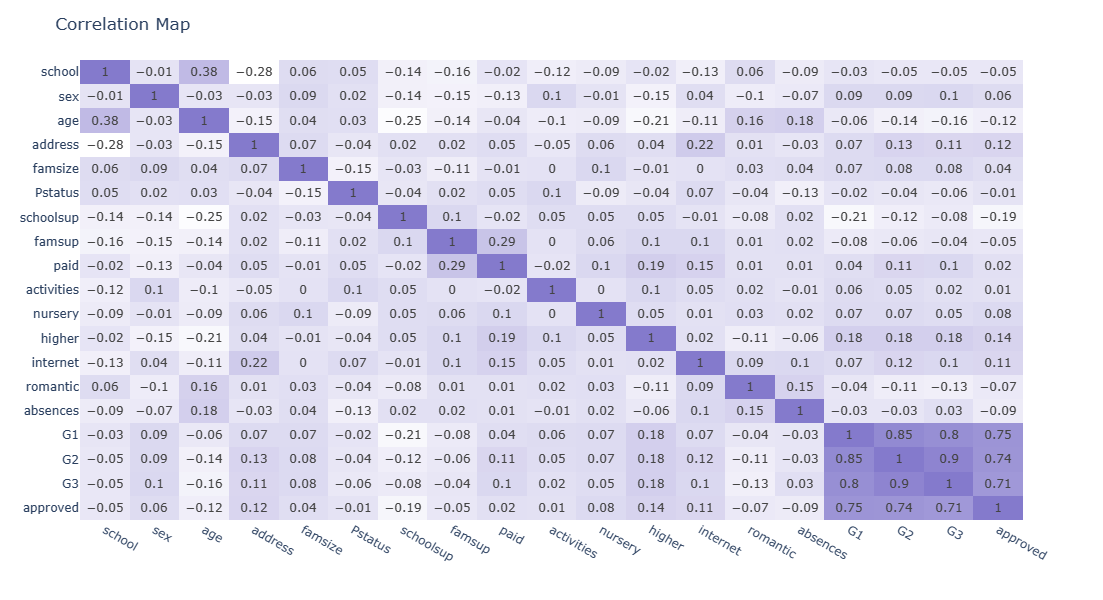

In [18]:
# correlation for binary, ordinal and continuous variables
custom_scale = ['white', '#847ACC']

fig = px.imshow(num_df.drop(columns = ordinal_variables).corr(method = "pearson").round(2), text_auto=True, aspect="auto", color_continuous_scale=custom_scale)
fig.layout.height = 600
fig.layout.width = 1050
fig.update_coloraxes(showscale=False)
fig.update_layout(
    title_text="Correlation Map")
fig.show()

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Insights:</font></h3>
    
There is a strong correlation ($> 0.8$) between `G1`, `G2`, `G3`, and `approved`.

<h3> <font color= #847ACC> Kendall's Tau-b for Ordinal Data</h3>

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡</font></h3>
    
For ordinal data, correlation can be measured by methods using the ordering of the data.
The Kendall's tau-b correlation coecient is a non parametric measure of association that can be applied to ordinal data.

The range of the coefficients is from -1 (negative correlation) to 1 (positive correlation).

In [19]:
ord_df = num_df[ordinal_variables]
ord_df.head(2)

Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  Dalc   
0     4     4           2          2         0       4         3      4     1  \
1     1     1           1          2         0       5         3      3     1   

   Walc  health  
0     1       3  
1     1       3

In [20]:
# Create an empty DataFrame for storing the results
kendalls_tau_matrix = pd.DataFrame(index=ord_df.columns, columns=ord_df.columns)

# Compute Kendall's Tau-b for each pair of variables
for col1 in ord_df.columns:
    for col2 in ord_df.columns:
        if col1 != col2:
            tau, _ = kendalltau(ord_df[col1], ord_df[col2], variant = 'b')
            kendalls_tau_matrix.at[col1, col2] = tau


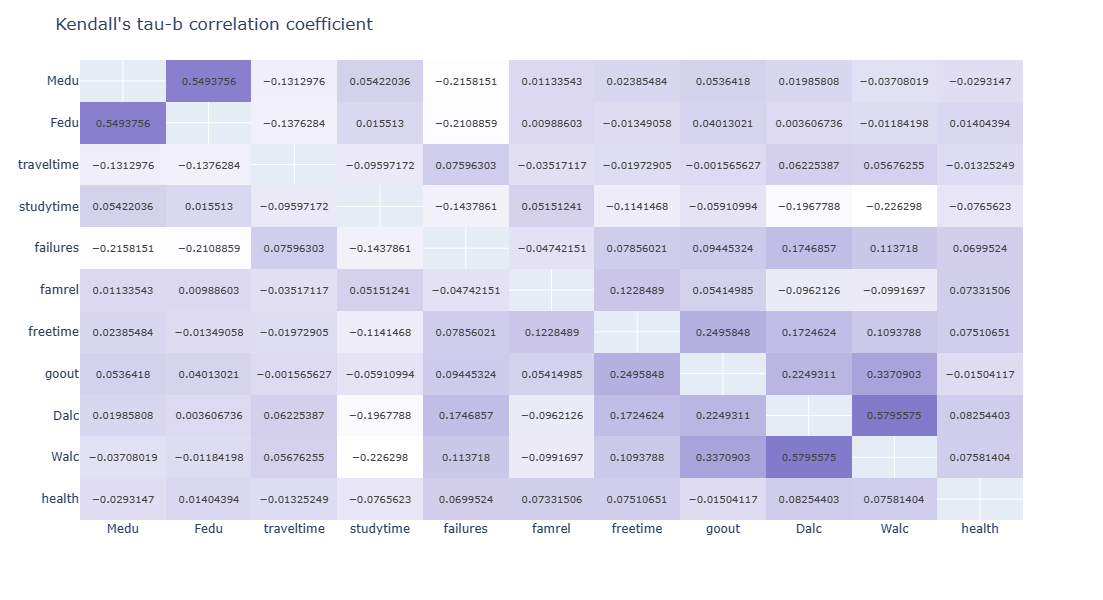

In [21]:
fig = px.imshow(kendalls_tau_matrix.round(2), text_auto=True, aspect="auto", color_continuous_scale=custom_scale)
fig.layout.height = 600
fig.layout.width = 1050
fig.update_coloraxes(showscale=False)
fig.update_layout(
    title_text="Kendall's tau-b correlation coefficient")
fig.show()

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Insights:</font></h3>
    
There is a moderate correlation between `Fedu` and `Medu`; `Dalc` and `Walc`.

<h3> <font color= #847ACC> Pearson's Contingency Coefficient for Nominal Data</h3>

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡</font></h3>
    
Pearson's Contingency Coefficient (Pearson C) can be used as a correlation coefficient for categorical variables. 

This measurement uses $\chi^2$ adjusted to the sample size n. The range of the coeffcients is from 0 to 1

$$C = \sqrt{\frac{\chi^2}{n+\chi^2}}$$

Where
- $\chi^2$ is the Pearson's chi-squared statistic

- $n$ is the total numbers of observations, i.e., the sample size.

If both variables are ordinal it's better to use some other kind of correlation coecient since Pearson's 
contingency cofficient don't give a direction and don't take into consideration the ordering of variables.

In [22]:
df[nominal_variables].head(2)

Mjob     Fjob  reason guardian
0  at_home  teacher  course   mother
1  at_home    other  course   father

In [23]:
def contingency_coefficient(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (chi2 + n))

In [24]:
n_columns = len(nominal_variables)
coefficient_matrix = np.zeros((n_columns, n_columns))

for i in range(n_columns):
    for j in range(n_columns):
        if i != j:
            contingency_table = pd.crosstab(df[nominal_variables[i]], df[nominal_variables[j]])
            coefficient_matrix[i, j] = contingency_coefficient(contingency_table)
        else:
            coefficient_matrix[i, j] = 1  # Diagonal elements are set to 1

In [25]:
coefficient_df = pd.DataFrame(coefficient_matrix, index=nominal_variables, columns=nominal_variables)

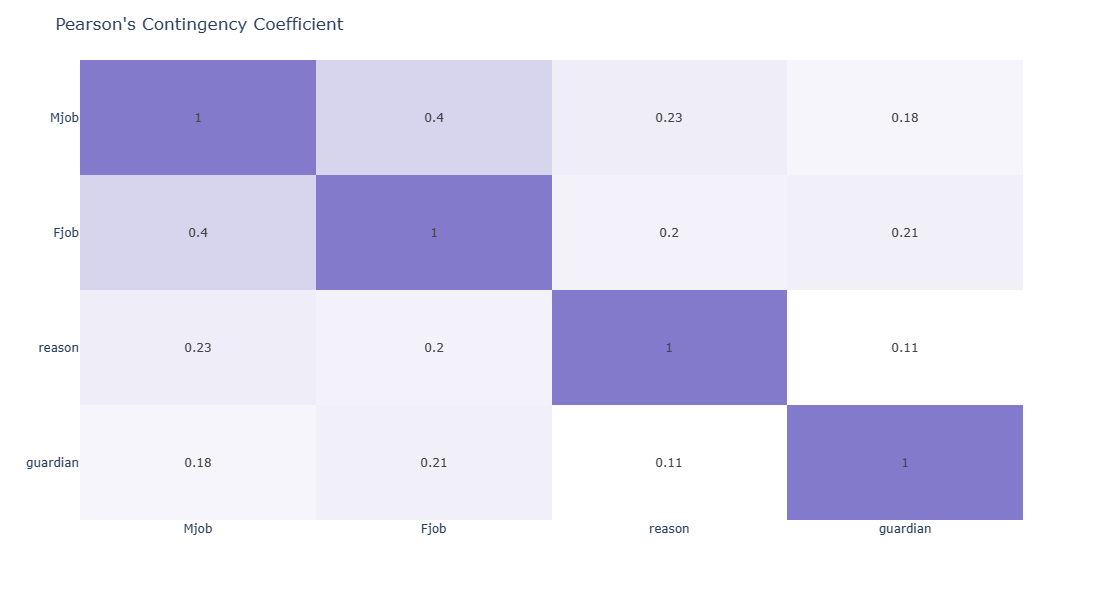

In [26]:
fig = px.imshow(coefficient_df.round(2), text_auto=True, aspect="auto", color_continuous_scale=custom_scale)
fig.layout.height = 600
fig.layout.width = 1050
fig.update_coloraxes(showscale=False)
fig.update_layout(
    title_text="Pearson's Contingency Coefficient ")
fig.show()

Four of the nominal variables had more than two categories. These variables can be transformed to dummy variables. The new groups of the nominal variables with more than two categories could be:

- reason: reputation (1) / other (0)

- guardian: mother (1) / other (0)

- Fjob: teacher (1) / other (0)

- Mjob: teacher (1) / other (0)



<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Insights:</font></h3>
    
There is a moderate correlation between `Fjob` and `Mjob`.

<h2> <font color= #847ACC> Statistics</h2>
<a id="EST"></a>
    
____

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h3> <font color= #847ACC> Measures of Central Tendency & Variability </h3>
<a id="MTCV"></a>

In [27]:
%%time
de.generate_data_description_table(num_df)

CPU times: total: 31.2 ms
Wall time: 100 ms


[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Distributions </h2>
<a id="DIST"></a>

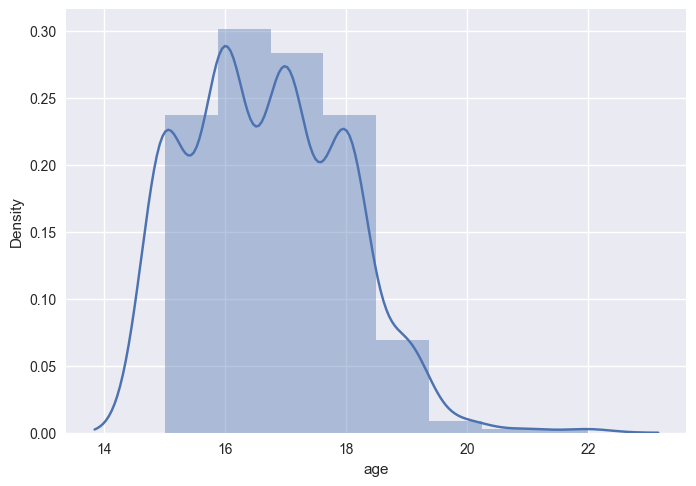

In [28]:
sns.distplot(num_df["age"], bins=8);

In [104]:
num_df.shape

(395, 30)

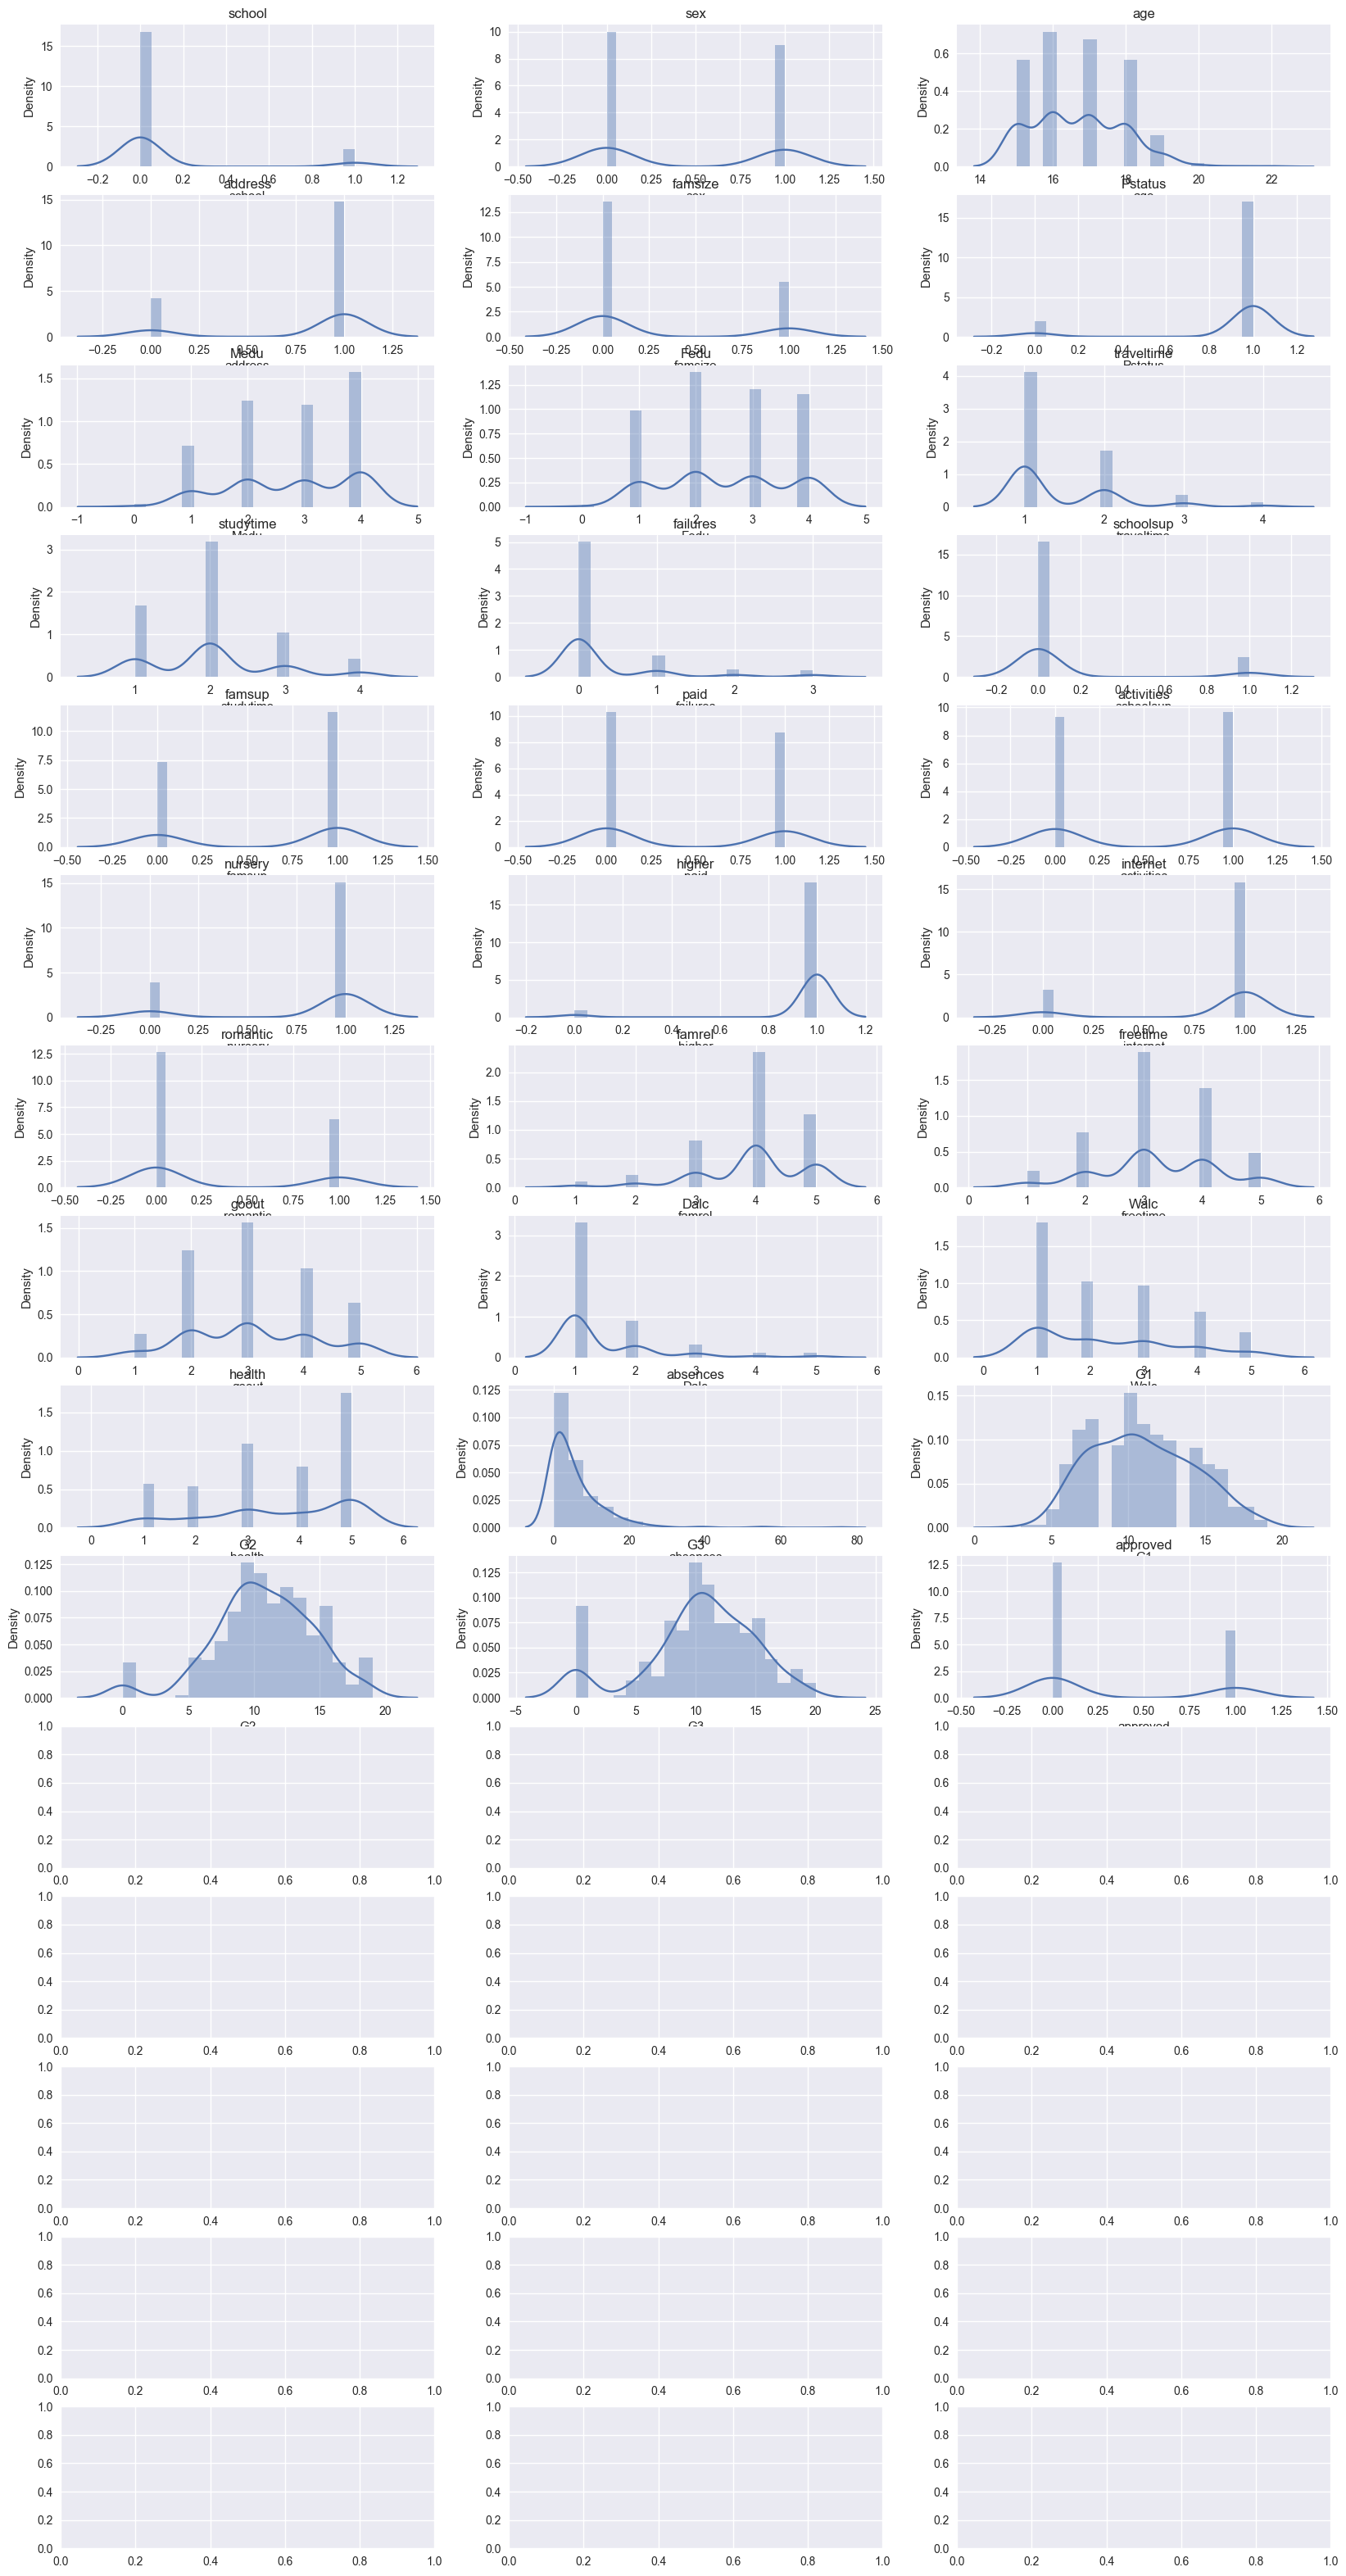

In [117]:
num_columns = len(num_df.columns)
cols = 3
rows = 15 # (num_columns + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(rows, cols, figsize=(20, 40))  # Adjust the figure size as needed
axes = axes.flatten()

for i, column in enumerate(num_df.columns):
    # Calculate the number of bins using the square root rule
    num_bins = int(np.sqrt(num_df[column].size))
    
    # Plotting the distribution
    sns.distplot(num_df[column], bins=num_bins, ax=axes[i])
    axes[i].set_title(column)


plt.show()


In [121]:
num_df["school"].nunique() == 2

True

In [122]:
sorted(num_df["school"].unique()) == [0, 1]

True

In [128]:
# num_columns = len(num_df.columns)
# num_plots_per_row = 3
# num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row

# fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5 * num_rows))
# axes = axes.flatten()  # Flatten the axes array for easier indexing

# for i, col in enumerate(num_df.columns):
#     ax = axes[i]
#     # Check if the column is binary
#     if num_df[col].nunique() == 2:
#         num_bins = 2
#         ax.set_xticks([0, 1])  # Set x-axis ticks to 0 and 1 for binary variables
#     else:
#         num_bins = int(np.sqrt(num_df[col].size))

#     sns.distplot(num_df[col], ax=ax, bins=num_bins)
#     ax.set_title(col)

# # Hide any unused axes if the number of plots is less than the grid size
# for i in range(len(num_df.columns), len(axes)):
#     axes[i].set_visible(False)

# plt.tight_layout()
# plt.savefig("imgs/distributions.png")
# plt.show()

<img src="imgs/distributions.png">

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Class Balance </h2>
<a id="BAL"></a>

In [126]:
# I think the criteria should be inclusive :)

print(Counter(num_df["G3"] > 12))
print(Counter(num_df["G3"] >= 12))

Counter({False: 264, True: 131})
Counter({False: 233, True: 162})


In [129]:
class_count = pd.value_counts(num_df['approved'], sort = True).sort_index()
class_count

approved
0    264
1    131
Name: count, dtype: int64

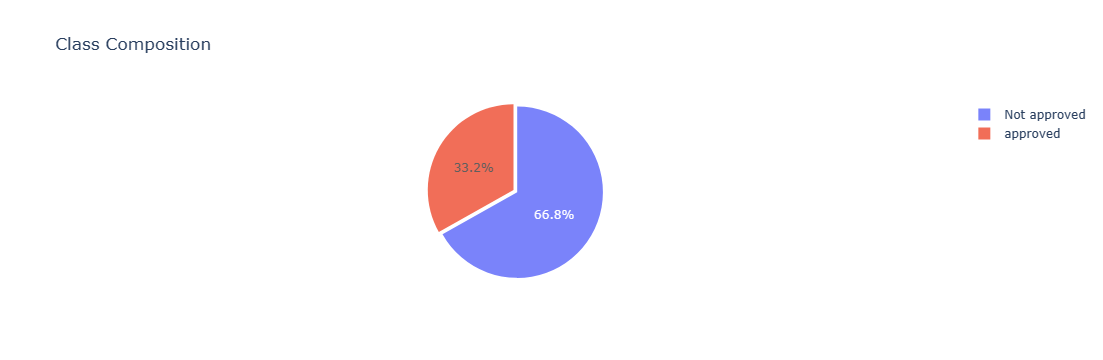

CPU times: total: 0 ns
Wall time: 8.28 ms


In [130]:
%%time
# Class Composition - Pie Plot
fig = go.Figure(data=[go.Pie(labels=['Not approved', 'approved'], 
                                    values=class_count, 
                                    pull=[0.05, 0, 0], 
                                    opacity=0.85)])
fig.update_layout(
    title_text="Class Composition")
fig.show()

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#847ACC'>💡 Insights:</font></h3>
    
The data seems moderately imbalanced.

Some techniques to address this problem are:

- Subsampling
- Class Weights
- *Oversampling

*There is some controversial opinions about Oversampling techniques such as SMOTE. Some argue that it is not ok to create synthetic data.

De hecho, hay un paper que lo explica: https://arxiv.org/abs/2201.08528

___

<h1> <font color= #847ACC> Models </h1>
<a id="MODELOS"></a>

_"All models are wrong, but some are useful"_ \
— George Box


[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="5"></div>](#IND)
<h2> <font color= #847ACC> Logistic Regression </h2>
<a id="RL"></a>

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#ECB431'>💡 Justification:</font></h3>
    
- Logistic Regression is a relatively simple algorithm; it transforms a linear input into a probability (in the range of 0-1) using the Sigmoid function:

$$S(x) = \frac{1}{1+e^{-X\beta}}$$
 
Where $X$ is the set of predictor features, and $\beta$ is the corresponding weight vector. Computing $S(x)$ yields a probability indicating whether an observation should be classified as `1` or `0`.
<br>

- It is highly interpretable due to its output (probabilities), making it easier to explain to a non-technical audience compared to other models.

- Computationally, it requires less computational power compared to more complex models such as Neural Networks or Decision Trees.
    

In [33]:
Counter(num_df["age"])

Counter({16: 104, 17: 98, 18: 82, 15: 82, 19: 24, 20: 3, 22: 1, 21: 1})

In [34]:
test_df = num_df.copy()

In [35]:
test_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'approved'],
      dtype='object')

In [36]:
# Save as array the features and the classes
X = num_df.iloc[:, 0:-3].values # Dropped G2 and G3 to avoid redundant information  and prevent overfitting
y = num_df.iloc[:, -1].values

In [37]:
num_df.iloc[:, 0:-3].head(1)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime   
0       0    0   18        1        0        0     4     4           2  \

   studytime  failures  schoolsup  famsup  paid  activities  nursery  higher   
0          2         0          1       0     0           0        1       1  \

   internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences   
0         0         0       4         3      4     1     1       3         6  \

   G1  
0   5

In [38]:
# Split data after Oversampling and Undersampling
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
# Logistic Regression with Subsampling, Oversampling and Class Weights
LR = LogisticRegression(random_state = 0, C=10, penalty= 'l2', class_weight = {0: 1, 1:1})

In [40]:
LR.fit(x_train1, y_train1) #.predict(X).sum()

LogisticRegression(C=10, class_weight={0: 1, 1: 1}, random_state=0)

In [41]:
# Refit param is for GS to optimize for that metric.

def grids(search_space: np.ndarray, opt_metric: str, cv: int):
    
    grid_ = GridSearchCV(
    estimator = LogisticRegression(max_iter = 500),
    param_grid = {'class_weight': [{0: 1, 1:v} for v in search_space]},
    scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'f1': make_scorer(f1_score)},
    refit = opt_metric, 
    return_train_score = True,
    cv = cv,
    n_jobs = -1
    )
    
    return grid_

In [42]:
grid_acc = grids(np.linspace(1, 20, 30), opt_metric = 'accuracy', cv = 10)

In [43]:
grid_prec = grids(np.linspace(1, 20, 30), opt_metric = 'precision', cv = 10)

In [44]:
grid_rec = grids(np.linspace(1, 20, 30), opt_metric = 'recall', cv = 10)

In [45]:
grid_f1 = grids(np.linspace(1, 20, 30), opt_metric = 'f1', cv = 10)

In [46]:
%%time
grid_acc.fit(x_train1, y_train1)
grid_acc.best_params_['class_weight']

CPU times: total: 438 ms
Wall time: 4.34 s


{0: 1, 1: 2.310344827586207}

In [47]:
%%time
grid_prec.fit(x_train1, y_train1)
grid_prec.best_params_['class_weight']

CPU times: total: 312 ms
Wall time: 2.49 s


{0: 1, 1: 1.0}

In [48]:
%%time
# ¡¡¡Notice how a model focused on detecting more 1's (recall) assigns a lot of weight to '1'.!!!
grid_rec.fit(x_train1, y_train1)
grid_rec.best_params_['class_weight']

CPU times: total: 328 ms
Wall time: 2.62 s


{0: 1, 1: 8.862068965517242}

In [49]:
%%time
grid_f1.fit(x_train1, y_train1)
grid_f1.best_params_['class_weight']

CPU times: total: 281 ms
Wall time: 2.63 s


{0: 1, 1: 2.310344827586207}

In [50]:
# These are the results of the GridSearch
# Originally, it uses 'mean_test_score' for optimization, with the default score being Accuracy.
# In a highly imbalanced case, it's not a good choice to use it as a reference metric.
# It will be changed to precision, recall, or f1, as appropriate. They are added to the GridSearch.

df = pd.DataFrame(grid_f1.cv_results_)

In [51]:
df[['param_class_weight', 'params',
    'mean_test_accuracy', 'mean_train_accuracy',
    'mean_test_precision', 'mean_train_precision', 
    'mean_test_recall', 'mean_train_recall',
    'mean_test_f1', 'mean_train_f1']]

# These results are from the first fit, that is, with optimized precision, which is why weights 0:1 and 1:1 are chosen.
# Notice how the precision is decreasing

param_class_weight   
0                  {0: 1, 1: 1.0}  \
1   {0: 1, 1: 1.6551724137931034}   
2    {0: 1, 1: 2.310344827586207}   
3   {0: 1, 1: 2.9655172413793105}   
4   {0: 1, 1: 3.6206896551724137}   
5    {0: 1, 1: 4.275862068965517}   
6    {0: 1, 1: 4.931034482758621}   
7    {0: 1, 1: 5.586206896551724}   
8    {0: 1, 1: 6.241379310344827}   
9    {0: 1, 1: 6.896551724137931}   
10   {0: 1, 1: 7.551724137931034}   
11   {0: 1, 1: 8.206896551724139}   
12   {0: 1, 1: 8.862068965517242}   
13   {0: 1, 1: 9.517241379310345}   
14  {0: 1, 1: 10.172413793103448}   
15  {0: 1, 1: 10.827586206896552}   
16  {0: 1, 1: 11.482758620689655}   
17  {0: 1, 1: 12.137931034482758}   
18  {0: 1, 1: 12.793103448275861}   
19  {0: 1, 1: 13.448275862068964}   
20  {0: 1, 1: 14.103448275862068}   
21  {0: 1, 1: 14.758620689655173}   
22  {0: 1, 1: 15.413793103448276}   
23   {0: 1, 1: 16.06896551724138}   
24  {0: 1, 1: 16.724137931034484}   
25  {0: 1, 1: 17.379310344827587}   
26   {0: 1, 1: 18.03448275862069}   
27  {0: 1, 1: 18.689655172413794}   
28  {0: 1, 1: 19.344827586206897}   
29                {0: 1, 1: 20.0}   

                                             params  mean_test_accuracy   
0                  {'class_weight': {0: 1, 1: 1.0}}            0.841835  \
1   {'class_weight': {0: 1, 1: 1.6551724137931034}}            0.848085   
2    {'class_weight': {0: 1, 1: 2.310344827586207}}            0.857661   
3   {'class_weight': {0: 1, 1: 2.9655172413793105}}            0.851109   
4   {'class_weight': {0: 1, 1: 3.6206896551724137}}            0.844758   
5    {'class_weight': {0: 1, 1: 4.275862068965517}}            0.841532   
6    {'class_weight': {0: 1, 1: 4.931034482758621}}            0.838407   
7    {'class_weight': {0: 1, 1: 5.586206896551724}}            0.838407   
8    {'class_weight': {0: 1, 1: 6.241379310344827}}            0.838407   
9    {'class_weight': {0: 1, 1: 6.896551724137931}}            0.835282   
10   {'class_weight': {0: 1, 1: 7.551724137931034}}            0.828931   
11   {'class_weight': {0: 1, 1: 8.206896551724139}}            0.825706   
12   {'class_weight': {0: 1, 1: 8.862068965517242}}            0.825706   
13   {'class_weight': {0: 1, 1: 9.517241379310345}}            0.822581   
14  {'class_weight': {0: 1, 1: 10.172413793103448}}            0.822581   
15  {'class_weight': {0: 1, 1: 10.827586206896552}}            0.822581   
16  {'class_weight': {0: 1, 1: 11.482758620689655}}            0.822581   
17  {'class_weight': {0: 1, 1: 12.137931034482758}}            0.813105   
18  {'class_weight': {0: 1, 1: 12.793103448275861}}            0.809980   
19  {'class_weight': {0: 1, 1: 13.448275862068964}}            0.809980   
20  {'class_weight': {0: 1, 1: 14.103448275862068}}            0.809980   
21  {'class_weight': {0: 1, 1: 14.758620689655173}}            0.806855   
22  {'class_weight': {0: 1, 1: 15.413793103448276}}            0.806855   
23   {'class_weight': {0: 1, 1: 16.06896551724138}}            0.806855   
24  {'class_weight': {0: 1, 1: 16.724137931034484}}            0.803629   
25  {'class_weight': {0: 1, 1: 17.379310344827587}}            0.803629   
26   {'class_weight': {0: 1, 1: 18.03448275862069}}            0.803629   
27  {'class_weight': {0: 1, 1: 18.689655172413794}}            0.803629   
28  {'class_weight': {0: 1, 1: 19.344827586206897}}            0.803629   
29                {'class_weight': {0: 1, 1: 20.0}}            0.803629   

    mean_train_accuracy  mean_test_precision  mean_train_precision   
0              0.914916             0.765696              0.869124  \
1              0.903301             0.741458              0.813789   
2              0.889239             0.741204              0.774738   
3              0.881854             0.725017              0.752898   
4              0.876228             0.708934              0.736777   
5              0.874820             0.705257              0.729232   
6              0.874469             0.692382       

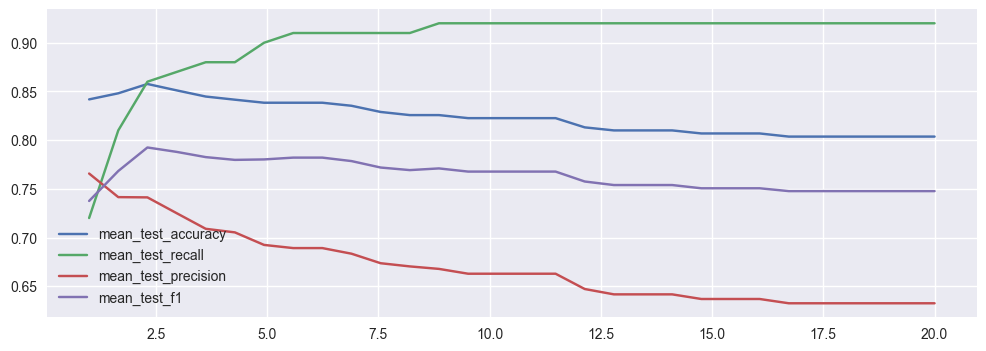

In [52]:
plt.figure(figsize = (12, 4))
for score in ['mean_test_accuracy', 'mean_test_recall', 'mean_test_precision', 'mean_test_f1']:
    plt.plot([_[1] for _ in df['param_class_weight']],
             df[score],
             label = score)
plt.legend();

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="10"></div>](#IND)
<h3> <font color= #847ACC> Metrics </h3>
<a id="LRMET"></a>

In [53]:
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n==========================================================================")
        print("__________________________________________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n==========================================================================")        
        print("__________________________________________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("__________________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [54]:
# Confussion Matrix Function
def CM(y_test, y_pred):
    
    # Confussion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')

<h3> <font color= #847ACC> Case 1- Optimizing Accuracy </h3>

In [55]:
acc_train_pred = grid_acc.predict(x_train1)
acc_test_pred = grid_acc.predict(x_test1)

In [56]:
print_score(y_train1, acc_train_pred, train=True)
print_score(y_test1, acc_test_pred, train=False)

Train Result:
__________________________________________________________________________
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959596    0.779661  0.892405    0.869628      0.902655
recall       0.879630    0.920000  0.892405    0.899815      0.892405
f1-score     0.917874    0.844037  0.892405    0.880956      0.894508
support    216.000000  100.000000  0.892405  316.000000    316.000000
__________________________________________________________________________
Confusion Matrix: 
 [[190  26]
 [  8  92]]

Test Result:
__________________________________________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.920000   0.931034  0.924051   0.925517      0.924330
recall      0.958333   0.870968  0.924051   0.914651      0.924051
f1-score    0.938776   0.900000  0.924051   0.919388      0.923560
support    48.000000  31.000000  0.92405

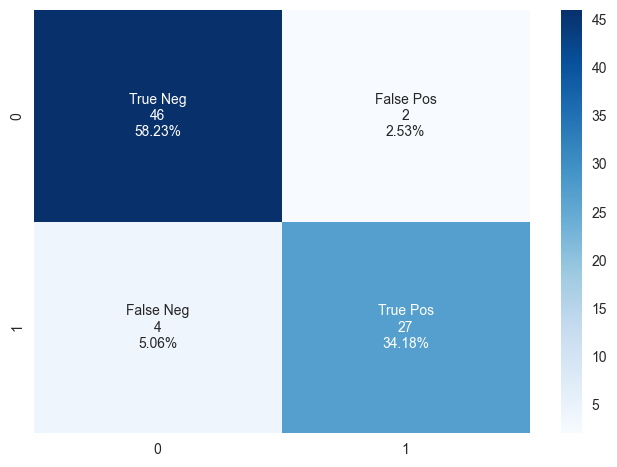

In [57]:
CM(y_test1, acc_test_pred)

In [58]:
print(roc_auc_score(y_train1, acc_train_pred))

print(roc_auc_score(y_test1, acc_test_pred))

0.8998148148148148
0.9146505376344087


<h3> <font color= #847ACC> Case 2- Optimizing Precision </h3>

In [59]:
prec_train_pred = grid_prec.predict(x_train1)
prec_test_pred = grid_prec.predict(x_test1)

In [60]:
print_score(y_train1, prec_train_pred, train=True)
print_score(y_test1, prec_test_pred, train=False)

Train Result:
__________________________________________________________________________
Classification Report:
                    0       1  accuracy   macro avg  weighted avg
precision    0.939815    0.87  0.917722    0.904907      0.917722
recall       0.939815    0.87  0.917722    0.904907      0.917722
f1-score     0.939815    0.87  0.917722    0.904907      0.917722
support    216.000000  100.00  0.917722  316.000000    316.000000
__________________________________________________________________________
Confusion Matrix: 
 [[203  13]
 [ 13  87]]

Test Result:
__________________________________________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.867925   0.923077  0.886076   0.895501      0.889567
recall      0.958333   0.774194  0.886076   0.866263      0.886076
f1-score    0.910891   0.842105  0.886076   0.876498      0.883899
support    48.000000  31.000000  0.886076  79.000000     79.

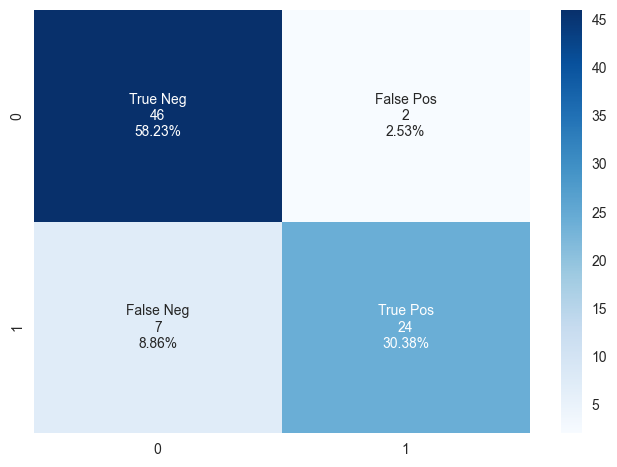

In [61]:
CM(y_test1, prec_test_pred)

In [62]:
print(roc_auc_score(y_train1, prec_train_pred))

print(roc_auc_score(y_test1, prec_test_pred))

0.9049074074074074
0.8662634408602151


<h3> <font color= #847ACC> Case 3- Optimizing Recall </h3>

In [63]:
rec_train_pred = grid_rec.predict(x_train1)
rec_test_pred = grid_rec.predict(x_test1)

In [64]:
print_score(y_train1, rec_train_pred, train=True)
print_score(y_test1, rec_test_pred, train=False)

Train Result:
__________________________________________________________________________
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.694444  0.860759    0.847222      0.903305
recall       0.796296    1.000000  0.860759    0.898148      0.860759
f1-score     0.886598    0.819672  0.860759    0.853135      0.865419
support    216.000000  100.000000  0.860759  316.000000    316.000000
__________________________________________________________________________
Confusion Matrix: 
 [[172  44]
 [  0 100]]

Test Result:
__________________________________________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.936170   0.875000  0.911392   0.905585      0.912167
recall      0.916667   0.903226  0.911392   0.909946      0.911392
f1-score    0.926316   0.888889  0.911392   0.907602      0.911629
support    48.000000  31.000000  0.91139

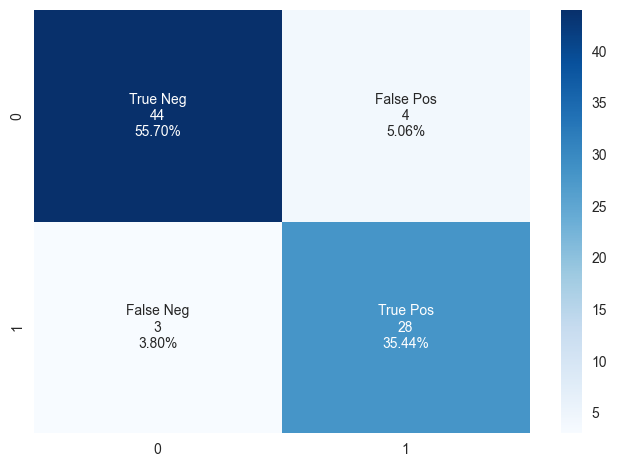

In [65]:
CM(y_test1, rec_test_pred)

In [66]:
print(roc_auc_score(y_train1, rec_train_pred))

print(roc_auc_score(y_test1, rec_test_pred))

0.8981481481481481
0.9099462365591398


<h3> <font color= #847ACC> Case 4- Optimizing f1-score </h3>

In [67]:
f1_train_pred = grid_f1.predict(x_train1)
f1_test_pred = grid_f1.predict(x_test1)

In [68]:
print_score(y_train1, f1_train_pred, train=True)
print_score(y_test1, f1_test_pred, train=False)

Train Result:
__________________________________________________________________________
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959596    0.779661  0.892405    0.869628      0.902655
recall       0.879630    0.920000  0.892405    0.899815      0.892405
f1-score     0.917874    0.844037  0.892405    0.880956      0.894508
support    216.000000  100.000000  0.892405  316.000000    316.000000
__________________________________________________________________________
Confusion Matrix: 
 [[190  26]
 [  8  92]]

Test Result:
__________________________________________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.920000   0.931034  0.924051   0.925517      0.924330
recall      0.958333   0.870968  0.924051   0.914651      0.924051
f1-score    0.938776   0.900000  0.924051   0.919388      0.923560
support    48.000000  31.000000  0.92405

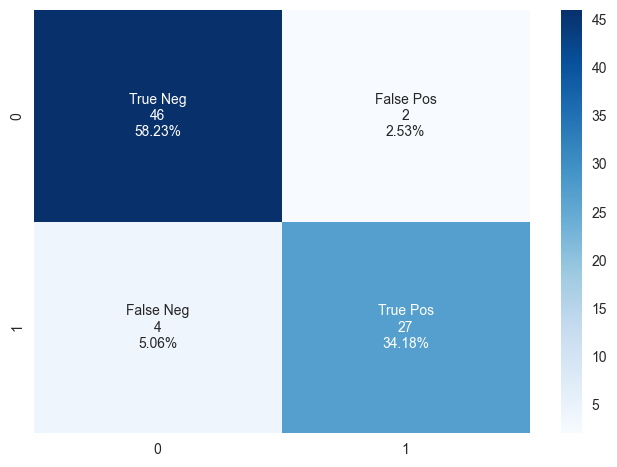

In [69]:
CM(y_test1, f1_test_pred)

In [70]:
print(roc_auc_score(y_train1, f1_train_pred))

print(roc_auc_score(y_test1, f1_test_pred))

0.8998148148148148
0.9146505376344087


In [71]:
# # Save the model to a file
# joblib.dump(grid_f1, 'models/LR_f1_G1.pkl')

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#ECB431'>💡 Interpretation:</font></h3>

- **True Positives (TP)**: The number of correctly classified positive instances as positive.
    - Example: Predicting that a transaction is fraud when indeed, _IT IS_.
    <br>
    <br>
- **False Positives (FP)**: _Type 1 Error_, the number of negative instances incorrectly classified as positive.
    - Example: Predicting that a transaction is fraud when it is _NOT_.
    <br>
    <br>     
- **True Negatives (TN)**: The number of negative instances correctly classified as negative.
    - Example: Predicting that it is a _NOT_ fraudulent transaction when it actually is _NOT_ fraudulent.
    <br>
    <br>
- **False Negatives (FN)**: Type 2 Error: The number of positive instances incorrectly classified as negative.

    - Example: Predicting a transaction is NOT fraudulent when it actually _IS_.
    <br>
    <br>  
    
___
    
- **Precision**: $\quad \frac{TP}{(TP+FP)}$

    - It is the proportion of correctly predicted positive classes in relation to all elements predicted as positive.
    <br>
    <br>  
- **Recall**: $\quad \frac{TP}{(TP+FN)}$

    - It is the proportion of correctly predicted positive classes in relation to all elements that are actually positive.
    <br>
    <br>     
- **f1**: $\quad 2 \cdot \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{(\text{Precision} + \text{Recall})}$
  
    - It is the harmonic mean of the two metrics, although it completely ignores the True Negatives (TN). Likewise, it gives equal importance to both metrics.

___
    

❗️**¿Which metric should be considered more important?**
    
- a

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="10"></div>](#IND)
<h3> <font color= #847ACC> Decile Analysis </h3>
<a id="DAN"></a>

In [72]:
y_test1 = y_test1.reshape(y_test1.shape[0],)

In [73]:
# Unlike .predict, .predict_proba returns the probabilities without the threshold criterion.
probs = grid_f1.predict_proba(x_test1)

In [74]:
# There is an array with the probabilities for class 0 and 1, where these are complementary.
# We will work with the probabilities of class 1.
print(probs.shape)
probs_1 = probs[:, 1]

(79, 2)


In [75]:
# Create a DataFrame
dfx = pd.DataFrame({'TrueLabel': y_test1, 'Probability': probs_1})

In [76]:
# Sort by probabilities
dfx = dfx.sort_values(by='Probability', ascending=False)

In [77]:
# Divide into deciles
dfx['Decile'] = pd.qcut(dfx['Probability'], 10, labels=False)

In [78]:
# Analyze each decile
decile_analysis = dfx.groupby('Decile').agg(
    Num_Observations=('TrueLabel', 'count'),
    Num_Positives=('TrueLabel', 'sum'),
    Avg_Probability=('Probability', 'mean')
)

In [79]:
decile_analysis

Num_Observations  Num_Positives  Avg_Probability
Decile                                                  
0                      8              0         0.000178
1                      8              0         0.000887
2                      8              0         0.005404
3                      8              1         0.015565
4                      8              0         0.049589
5                      7              2         0.218340
6                      8              5         0.580997
7                      8              7         0.931487
8                      8              8         0.987969
9                      8              8         0.998533

<div style="border-radius:14px; border:#847ACC solid; padding: 15px; background-color: #FFFFFF; font-size:100%; text-align:left">
<h3 align="left"><font color='#ECB431'>💡 Interpretation:</font></h3>

- a

[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="10"></div>](#IND)
<h3> <font color= #847ACC> Predictions with new Threshold </h3>
<a id="LRPNT"></a>

In [80]:
# probabilities: The predicted probabilities from your logistic regression model
# y_test: The true labels

# Define a range of possible thresholds
thresholds = np.linspace(0, 1, 100)

# Initialize a DataFrame to store metrics for each threshold
metrics = []

# Evaluate each threshold
for threshold in thresholds:
    # Apply the threshold
    predictions = (probs_1 >= threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test1, predictions)
    precision = precision_score(y_test1, predictions)
    recall = recall_score(y_test1, predictions)
    f1 = f1_score(y_test1, predictions)

    # Store metrics
    metrics.append([threshold, accuracy, precision, recall, f1])

# Convert metrics to a DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Find the threshold with the best balance - example: highest F1 score
optimal_threshold = metrics_df.loc[metrics_df['F1'].idxmax(), 'Threshold']

print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.4747474747474748


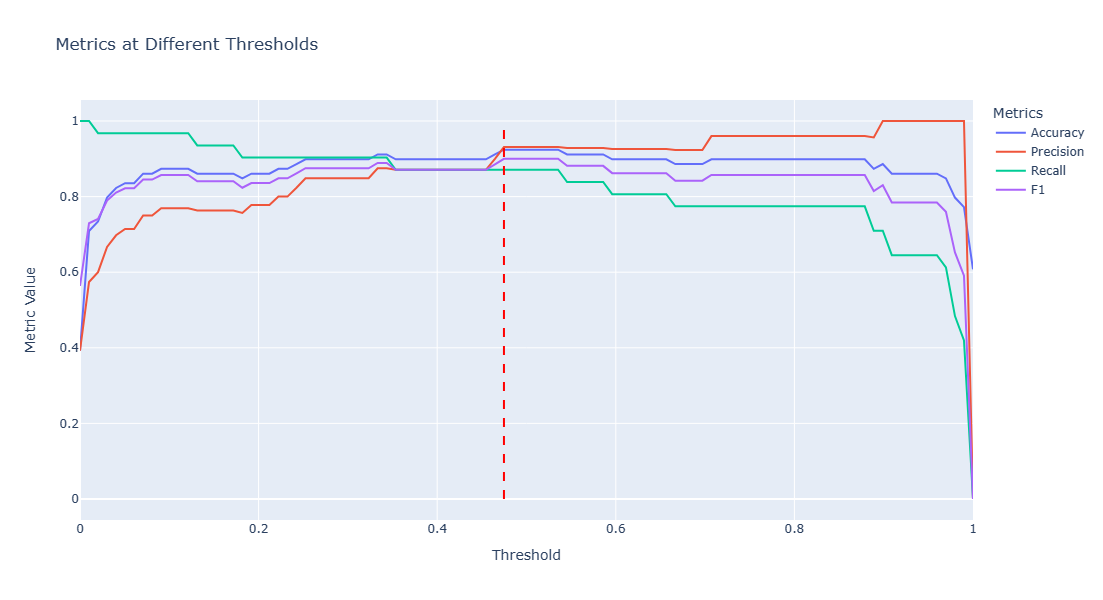

In [81]:
# Create a figure
fig = go.Figure()

# Add traces for Accuracy, Precision, Recall, and F1
fig.add_trace(go.Scatter(x=metrics_df["Threshold"], y=metrics_df["Accuracy"], mode='lines', name='Accuracy'))
fig.add_trace(go.Scatter(x=metrics_df["Threshold"], y=metrics_df["Precision"], mode='lines', name='Precision'))
fig.add_trace(go.Scatter(x=metrics_df["Threshold"], y=metrics_df["Recall"], mode='lines', name='Recall'))
fig.add_trace(go.Scatter(x=metrics_df["Threshold"], y=metrics_df["F1"], mode='lines', name='F1'))

# Add a vertical line for the optimal threshold
fig.add_shape(type='line', 
              x0=optimal_threshold, y0=0, 
              x1=optimal_threshold, y1=1,
              line=dict(color='Red', width=2, dash='dash'),
              name=f'Optimal Threshold ({optimal_threshold:.2f})')

# Update layout with titles and labels
fig.update_layout(title='Metrics at Different Thresholds',
                  xaxis_title='Threshold',
                  yaxis_title='Metric Value',
                  legend_title='Metrics',
                  width=1050,
                  height=600)

# Show the plot
fig.show()


In [82]:
new_predictions = (dfx['Probability'].sort_index(ascending=True) > optimal_threshold).astype(int)

In [83]:
print_score(y_test1, f1_test_pred, train=False)

Test Result:
__________________________________________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.920000   0.931034  0.924051   0.925517      0.924330
recall      0.958333   0.870968  0.924051   0.914651      0.924051
f1-score    0.938776   0.900000  0.924051   0.919388      0.923560
support    48.000000  31.000000  0.924051  79.000000     79.000000
__________________________________________________________________________
Confusion Matrix: 
 [[46  2]
 [ 4 27]]



In [84]:
print_score(y_test1, new_predictions, train=False)

Test Result:
__________________________________________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.920000   0.931034  0.924051   0.925517      0.924330
recall      0.958333   0.870968  0.924051   0.914651      0.924051
f1-score    0.938776   0.900000  0.924051   0.919388      0.923560
support    48.000000  31.000000  0.924051  79.000000     79.000000
__________________________________________________________________________
Confusion Matrix: 
 [[46  2]
 [ 4 27]]



[<div style="text-align:center"><img src="imgs/arrow.png" width="10" height="10"></div>](#IND)
<h2> <font color= #847ACC> XGBoost </h2>
<a id="XGB"></a>
    
###### — [Bojan Tunguz](https://twitter.com/tunguz)

In [85]:
from xgboost import XGBClassifier
import xgboost as xgb

In [86]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train1, y_train1, eval_metric='aucpr')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [87]:
y_train_pred = xgb_clf.predict(x_train1)
y_test_pred = xgb_clf.predict(x_test1)

In [88]:
probs_xgb = xgb_clf.predict_proba(x_test1)

In [89]:
print_score(y_train1, y_train_pred, train=True)
print_score(y_test1, y_test_pred, train=False)

Train Result:
__________________________________________________________________________
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    216.0  100.0       1.0      316.0         316.0
__________________________________________________________________________
Confusion Matrix: 
 [[216   0]
 [  0 100]]

Test Result:
__________________________________________________________________________
Classification Report:
                   0          1  accuracy  macro avg  weighted avg
precision   0.884615   0.925926  0.898734   0.905271      0.900826
recall      0.958333   0.806452  0.898734   0.882392      0.898734
f1-score    0.920000   0.862069  0.898734   0.891034      0.897268
support    48.000000  31.000000  0.898734  79.000000     79.000000
____________________________

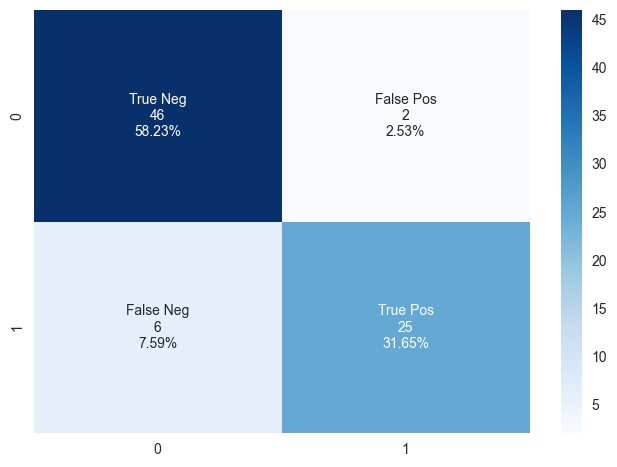

In [90]:
CM(y_test1, y_test_pred)

In [91]:
print(roc_auc_score(y_train1, y_train_pred))

print(roc_auc_score(y_test1, y_test_pred))

1.0
0.8823924731182796


In [92]:
# # Save the model to a file
# joblib.dump(xgb_clf, 'models/XGB_G1.pkl')

In [93]:
end_time = time.time()
total_time = end_time - start_time
print(f"Total runtime: {total_time:.2f} seconds")

Total runtime: 16.53 seconds
